In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Network Construction 

## 1. Transition Matrix

### 1.0 Import

Read out transition matrix as a Pandas dataframe. No need to use Dask from here because our transition matrix is 1000 x 1000 matrix. 

In [4]:
df = pd.read_csv("Transition_Matrix.csv", index_col=0)

In [5]:
df

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
11-1011.00,153583.0,25.0,44281.0,178.0,867.0,18447.0,23859.0,11130.0,93.0,1159.0,...,6.0,1.0,0.0,0.0,0.0,8.0,9.0,34.0,0.0,24.0
11-1011.03,26.0,47.0,23.0,1.0,0.0,30.0,10.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1021.00,61170.0,24.0,319037.0,71.0,1101.0,46666.0,76036.0,6822.0,73.0,3190.0,...,11.0,2.0,0.0,0.0,0.0,14.0,18.0,116.0,0.0,43.0
11-1031.00,166.0,0.0,49.0,18.0,2.0,22.0,43.0,64.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-2011.00,1806.0,1.0,1620.0,2.0,4329.0,7946.0,3817.0,1716.0,12.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55-3014.00,17.0,0.0,45.0,0.0,0.0,7.0,8.0,2.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,27.0,3.0,17.0,0.0,19.0
55-3015.00,12.0,0.0,37.0,0.0,0.0,10.0,15.0,4.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,1.0
55-3016.00,276.0,0.0,777.0,3.0,3.0,143.0,296.0,46.0,0.0,25.0,...,7.0,0.0,0.0,0.0,0.0,31.0,11.0,1119.0,0.0,55.0
55-3018.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.1 Intrepreating our Transition Matrix

In [7]:
total_hops = df.sum().sum()

In [8]:
total_hops

39756794.0

Note that our transition matrix is based on 12,815,753 unique profiles with 51,155,844 rows of job experiences (Refer to Dask_Turtorial.ipynb secion 1.3).

With our hop counting algorithm, we count a total of 39,756,794 hops. 

In [9]:
51155844 - 12815753

38340091

38,340,091 would be the total number of hops across occupations had we only counted experiences sequentially. However, we also count hops where one starts a new job occurs during an existing role. Thus, we may count more than one hop from each job experience. 

### 1.2 Transition Probability Matrix

In [225]:
trans_prob = df.div(df.sum(axis = 0), axis=1).replace(np.nan, 0)

In [226]:
trans_prob

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
11-1011.00,0.203465,0.029833,3.058450e-02,0.096634,0.017386,0.016729,0.019694,0.038362,0.039224,0.021417,...,0.011111,0.030303,0.0,0.0,0.0,0.010178,0.007557,0.003170,0.0,0.008872
11-1011.03,0.000034,0.056086,1.588590e-05,0.000543,0.000000,0.000027,0.000008,0.000103,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
11-1021.00,0.081037,0.028640,2.203561e-01,0.038545,0.022078,0.042319,0.062762,0.023514,0.030789,0.058947,...,0.020370,0.060606,0.0,0.0,0.0,0.017812,0.015113,0.010815,0.0,0.015896
11-1031.00,0.000220,0.000000,3.384387e-05,0.009772,0.000040,0.000020,0.000035,0.000221,0.000000,0.000092,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
11-2011.00,0.002393,0.001193,1.118920e-03,0.001086,0.086809,0.007206,0.003151,0.005915,0.005061,0.001035,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.001679,0.000093,0.0,0.001479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55-3014.00,0.000023,0.000000,3.108110e-05,0.000000,0.000000,0.000006,0.000007,0.000007,0.000000,0.000018,...,0.005556,0.000000,0.0,0.0,0.0,0.034351,0.002519,0.001585,0.0,0.007024
55-3015.00,0.000016,0.000000,2.555557e-05,0.000000,0.000000,0.000009,0.000012,0.000014,0.000000,0.000055,...,0.001852,0.000000,0.0,0.0,0.0,0.000000,0.024349,0.000000,0.0,0.000370
55-3016.00,0.000366,0.000000,5.366671e-04,0.001629,0.000060,0.000130,0.000244,0.000159,0.000000,0.000462,...,0.012963,0.000000,0.0,0.0,0.0,0.039440,0.009236,0.104326,0.0,0.020333
55-3018.00,0.000000,0.000000,6.906912e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


Note: $ A_{i,j} =$ transition from occupation i to j.

Check if our transition probability matrix is correct (column sums, summing across rows, should equal to 1).

In [227]:
column_sums = trans_prob.sum(axis=0) # Sum all rows for each column 

In [228]:
column_sums.sum() # Number of occupations that have transitions to other occupations

985.0

In [229]:
column_sums

11-1011.00    1.0
11-1011.03    1.0
11-1021.00    1.0
11-1031.00    1.0
11-2011.00    1.0
             ... 
55-3014.00    1.0
55-3015.00    1.0
55-3016.00    1.0
55-3018.00    0.0
55-3019.00    1.0
Length: 1016, dtype: float64

Basic analysis: 

In [230]:
# Occupations that are not dead ends (this includes self-loops). 
tp = trans_prob[trans_prob.sum(axis = 0) >0]      # Occupations that have a non-zero column

In [231]:
# Percentage of occupations that are not dead-ends.
len(tp)/len(trans_prob)

0.969488188976378

In [232]:
# Occupations that not dead ends to other occupations (i.e. exclude self loops)
diagonal_elements = trans_prob.values.diagonal()

sum_exc_self_loops = trans_prob.sum(axis = 0) - diagonal_elements

In [233]:
(trans_prob.values.diagonal() > 0.9).sum()
# No occupations that only contain self-loops.

0

97% of our occupations are not dead ends and can lead to other occupations.

We have no occupations that contain only self-loops. Thus, we have occupations that are either absolute dead-ends (can't move to any other job, even within the same ONET code category) or are open to transition to other occupation categories.

In [234]:
# Total number of pairs of occupations where transition occurs.
occ_trans = (trans_prob != 0).sum().sum()            # Total number of non-zero elements in our transition matrix

In [235]:
occ_trans

377703

## 2. Occupation-Specific Networks

#### 2.1 Transition Probaility Cutoff, $\phi$

We want filter our transition probability matrix to omit the edges where the transition probabilities are less than 5% (i.e. eliminate the occupation transitions that are unlikely to happen).

In [236]:
# PARAMETER 1: Define transition probability cutoff, theta, to be 5%. 
phi = 0.05

In [237]:
# Implement cutoff
trans_prob_mod = trans_prob.mask(trans_prob <phi, 0 )

In [238]:
( trans_prob_mod.values.diagonal() >0.9).sum()

0

In [239]:
# Number of non-zero transitions that were cutoff
(trans_prob != trans_prob_mod).sum().sum()   

375512

In [240]:
# Total non-zero transitions
(trans_prob_mod>0).sum().sum()

2191

In [241]:
# Percentage of total occupation transition paths cut off by adding our parameter
(trans_prob != trans_prob_mod).sum().sum()/ occ_trans

0.99419914588976

99.4% of total occupation transitions were less than 5% likely. This means that our data includes a wide range of occupation transitions (i.e. only 0.5% of occupation transitions are common (>5%)).

This suggests that setting our parameter to 5% is too strict. 

Now, we want to see if there are occupations that only lead to other occupations after excluding unlikely paths.

In [242]:
(trans_prob_mod != 0).sum(axis = 1) # For each row, how many occupation options to move to. For each i, number of non-zero j's.

11-1011.00    14
11-1011.03     1
11-1021.00    26
11-1031.00     0
11-2011.00     1
              ..
55-3014.00     0
55-3015.00     0
55-3016.00     3
55-3018.00     0
55-3019.00     0
Length: 1016, dtype: int64

In [243]:
(trans_prob_mod != 0).sum(axis = 1) == 1

11-1011.00    False
11-1011.03     True
11-1021.00    False
11-1031.00    False
11-2011.00     True
              ...  
55-3014.00    False
55-3015.00    False
55-3016.00    False
55-3018.00    False
55-3019.00    False
Length: 1016, dtype: bool

In [244]:
transition_to_one_occ = trans_prob_mod.loc[(trans_prob_mod != 0).sum(axis = 1) == 1]  # All the i's that have only 1 non-zero j.

In [245]:
transition_to_one_occ

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
11-1011.03,0.0,0.056086,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-2011.00,0.0,0.000000,0.0,0.0,0.086809,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-2033.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.06706,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-3012.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.060684,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-3013.01,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53-7041.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53-7061.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-1011.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-1016.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
(transition_to_one_occ.sum(axis = 1) >0).sum() # Check that the filtered rows actually meet the condition

472

In [247]:
transition_to_one_occ1 = transition_to_one_occ.copy()

In [248]:
np.fill_diagonal(transition_to_one_occ1.values, 0)

In [249]:
(transition_to_one_occ1.sum(axis = 1)>0).sum() # All i's have non-zero elements in the j (!= i) column (i.e. non-diagonal element).

472

#### 2.2 Path Length Cutoff, $\theta$

In [250]:
# PARAMETER 2: Path Length Cutoff, big_theta
# Note: Pre-set from Axelle's Thesis. Details for computing this is in Appendix A.1.
theta = 7 
 

Graph representation with NetworkX

In [251]:
DG = nx.DiGraph()

In [252]:
DG.add_nodes_from(trans_prob_mod.index.tolist())

In [210]:
for node in DG.nodes():
    print("Node", node, "exists in the graph")

Node 11-1011.00 exists in the graph
Node 11-1011.03 exists in the graph
Node 11-1021.00 exists in the graph
Node 11-1031.00 exists in the graph
Node 11-2011.00 exists in the graph
Node 11-2021.00 exists in the graph
Node 11-2022.00 exists in the graph
Node 11-2032.00 exists in the graph
Node 11-2033.00 exists in the graph
Node 11-3012.00 exists in the graph
Node 11-3013.00 exists in the graph
Node 11-3013.01 exists in the graph
Node 11-3021.00 exists in the graph
Node 11-3031.00 exists in the graph
Node 11-3031.01 exists in the graph
Node 11-3031.03 exists in the graph
Node 11-3051.00 exists in the graph
Node 11-3051.01 exists in the graph
Node 11-3051.02 exists in the graph
Node 11-3051.03 exists in the graph
Node 11-3051.04 exists in the graph
Node 11-3051.06 exists in the graph
Node 11-3061.00 exists in the graph
Node 11-3071.00 exists in the graph
Node 11-3071.04 exists in the graph
Node 11-3111.00 exists in the graph
Node 11-3121.00 exists in the graph
Node 11-3131.00 exists in th

In [287]:
# Add edges with weights from the DataFrame
for i, row in trans_prob_mod.iterrows():
    for j, weight in row.items():
        if weight != 0:  # Only add edges with non-zero weights
            DG.add_edge(i, j, weight=round(weight,4))

In [288]:
trans_prob_mod.loc['11-1011.03'][trans_prob_mod.loc['11-1011.03'] >0]

11-1011.03    0.056086
Name: 11-1011.03, dtype: float64

In [289]:
for edge in DG.edges(data=True):
    print("Edge:", edge)

Edge: ('11-1011.00', '11-1011.00', {'weight': 0.2035})
Edge: ('11-1011.00', '11-1031.00', {'weight': 0.0966})
Edge: ('11-1011.00', '11-3031.03', {'weight': 0.0513})
Edge: ('11-1011.00', '23-1011.00', {'weight': 0.051})
Edge: ('11-1011.00', '23-1022.00', {'weight': 0.0609})
Edge: ('11-1011.00', '23-1023.00', {'weight': 0.0792})
Edge: ('11-1011.00', '25-1112.00', {'weight': 0.0613})
Edge: ('11-1011.00', '29-1011.00', {'weight': 0.0561})
Edge: ('11-1011.00', '29-1024.00', {'weight': 0.0721})
Edge: ('11-1011.00', '29-9099.01', {'weight': 0.0833})
Edge: ('11-1011.00', '33-3031.00', {'weight': 0.0619})
Edge: ('11-1011.00', '47-5099.00', {'weight': 0.1})
Edge: ('11-1011.00', '49-9063.00', {'weight': 0.0813})
Edge: ('11-1011.00', '51-3093.00', {'weight': 0.0536})
Edge: ('11-1011.03', '11-1011.03', {'weight': 0.0561})
Edge: ('11-1021.00', '11-1011.00', {'weight': 0.081})
Edge: ('11-1021.00', '11-1021.00', {'weight': 0.2204})
Edge: ('11-1021.00', '11-2022.00', {'weight': 0.0628})
Edge: ('11-1021

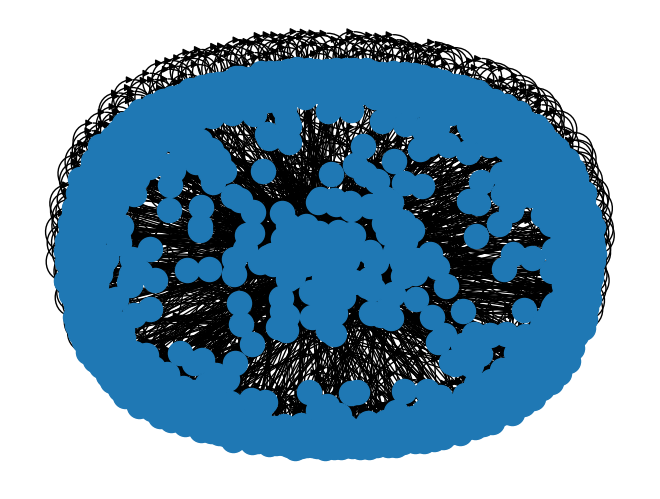

In [290]:
# Draw the graph
nx.draw(DG, with_labels = False)

In [260]:
start_node = '11-1011.00'
reachable_nodes = nx.descendants(DG, start_node)
subgraph = DG.subgraph(reachable_nodes)


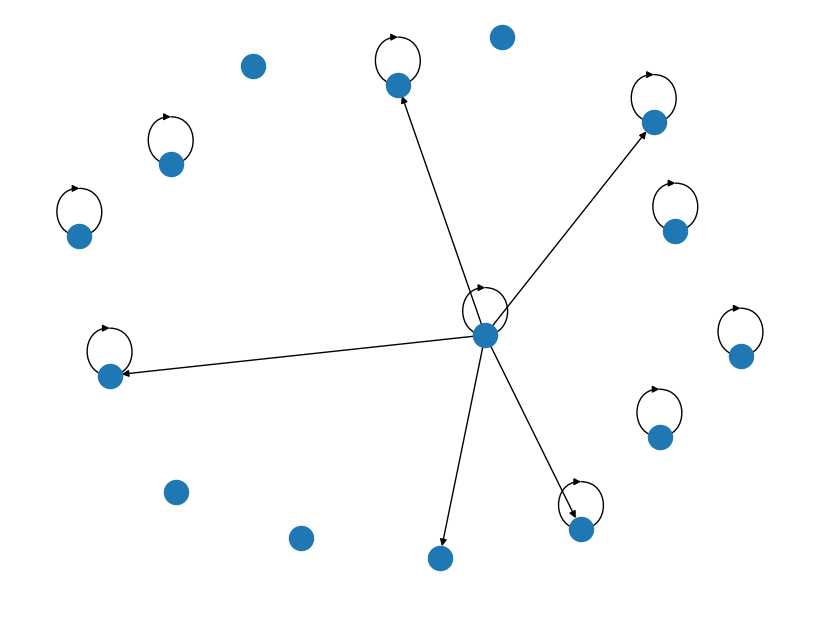

In [261]:
plt.figure(figsize=(8, 6))
nx.draw(subgraph)

Path Length Cutoff, $\phi$

In [292]:
# Find reachable nodes within a limited number of hops
start_node = '23-1011.00'
phi = 7
reachable_nodes = [node for node, path_length in nx.single_source_shortest_path_length(DG, start_node, cutoff=phi).items()]


In [293]:
nx.single_source_shortest_path_length(DG, start_node, cutoff=phi)

{'23-1011.00': 0,
 '23-1012.00': 1,
 '23-1021.00': 1,
 '23-1022.00': 1,
 '23-1023.00': 1,
 '25-1112.00': 1}

In [294]:
trans_prob_mod.loc['23-1012.00'][trans_prob_mod.loc['23-1012.00'] >0]

23-1012.00    0.241214
Name: 23-1012.00, dtype: float64

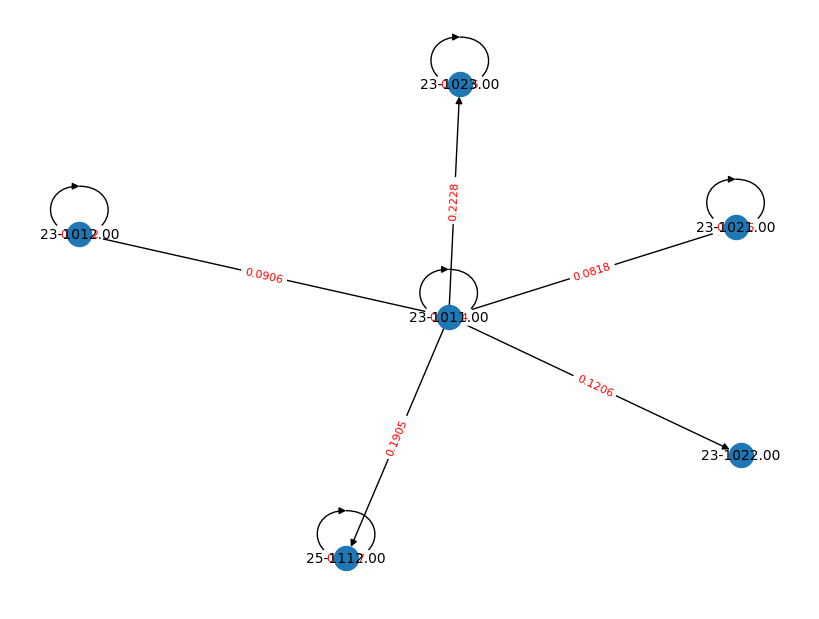

In [295]:
# Create a subgraph with only reachable nodes
subgraph = DG.subgraph(reachable_nodes)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)  # positions for all nodes
nx.draw(subgraph, pos,  with_labels = True, font_size=10,width=1.0, alpha=1)

# Draw edge labels
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels,font_color='red', font_size=8, label_pos=0.5)

plt.show()


##### Example of single_source_shortest_path_length

In [267]:
# Create a directed graph (example)
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (2, 5), (5, 6)])

# Compute shortest path lengths from source node 1 with a maximum hop limit of 7
source = 1
cutoff = 7
shortest_paths = nx.single_source_shortest_path_length(G, source, cutoff)

print("Shortest path lengths from source node {} within {} hops:".format(source, cutoff))
print(shortest_paths)

Shortest path lengths from source node 1 within 7 hops:
{1: 0, 2: 1, 3: 2, 5: 2, 6: 3}


#### 2.3 Minimum of 30 Transitions FROM the occupation 

In [272]:
# We create OSNs for these nodes only (for now)
source_nodes = df[df.sum(axis = 1) >30 ].index.to_list()

In [274]:
len(source_nodes)

953

Almost all occupations are selected. We have to make this parameter higher.

In [275]:
# OSN for the source nodes of our interest. 
def OSN(start_node, phi):
    return nx.single_source_shortest_path_length(DG, start_node, cutoff=phi)

In [278]:
osn = []
for i in source_nodes[:10]:  # Do this for 10 occupations.  
    osn.append(OSN(i,phi))

In [279]:
len(osn)

10

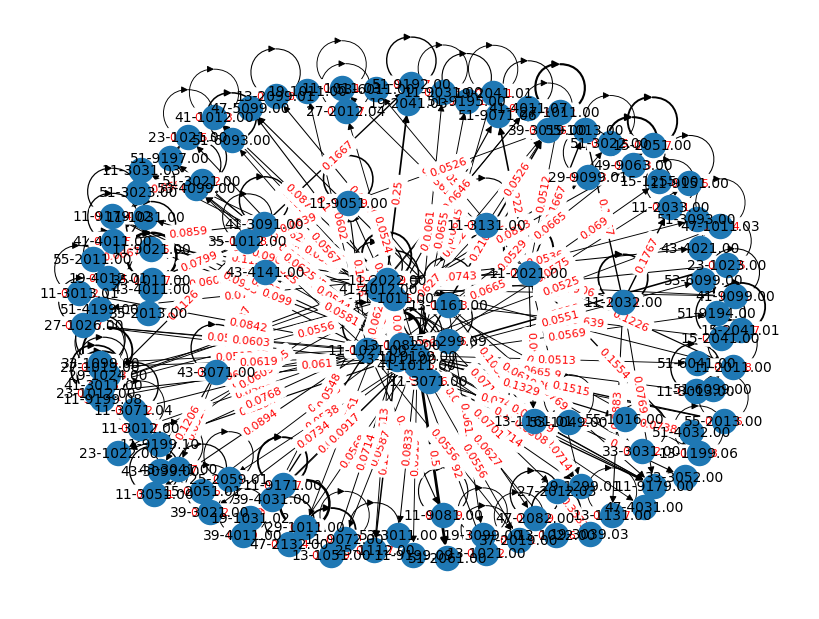

In [296]:
# Visualize 

reachable_nodes = [node for node,   path_length in osn[5].items()]

# Create a subgraph with only reachable nodes
subgraph = DG.subgraph(reachable_nodes)

# Define positions for the nodes (optional, for better visualization)
pos = nx.spring_layout(subgraph)  # positions for all nodes

# Extract edge weights as a dictionary
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
# Define edge widths based on the edge weights
edge_widths = [0.5 + 3 * weight for weight in edge_labels.values()]  # You can adjust this scaling factor as needed

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(subgraph, pos,  with_labels = True, font_size=10,width=edge_widths, alpha=1)

# Draw edge labels
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels,font_color='red', font_size=8, label_pos=0.5)

plt.show()



## 3. Occupational Mobility Indicators